In [12]:
#test the geo distance matrix, added in the function files
#weighted cluster method
library('data.table')
library('ggplot2')
library('ggmap')
library('dbscan')
library('dplyr')
funPath='D:/Git/Rprojects/ECA/function.R'
source(funPath)

In [132]:
dataPath='C:/Users/wzh/Desktop/compressed_trajectory_215896000.csv'
dataPath2='D:/Git/data/container/215896000.txt'
dataPath3='D:/Git/data/ECAContainerSpeedLessThanOneKnot/3438807_3.csv'
#dt=fread(file=dataPath);setnames(dt,c('mmsi','time','sog','lon','lat','status'));head(dt)
#dt=fread(file=dataPath);setnames(dt,c('mmsi','time','sog','lon','lat'));head(dt)
dt0=fread(file=dataPath3)[,list(mmsi,time,sog,lon,lat,status)];head(dt)

Read 3438807 rows and 8 (of 8) columns from 0.194 GB file in 00:00:12


mmsi      time       sog lon      lat      status
1 477865000 1395370645 0   121.6568 31.33707 0     
2 477865000 1395370646 0   121.6568 31.33707 0     
3 477865000 1395370656 0   121.6568 31.33707 0     
4 477865000 1395370666 0   121.6568 31.33707 0     
5 477865000 1395370695 0   121.6568 31.33707 0     
6 477865000 1395370705 0   121.6568 31.33707 0

In [410]:
setkey(dt,mmsi,time)
dt=dt0[sog==0];nrow(dt0)
set.seed(1234)
sampledt0=sample_n(dt,200000)
sampledt=dt[status==5][1:150000];nrow(sampledt)

[1] 3438807

[1] 150000

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=30.882647,121.546132&zoom=8&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false


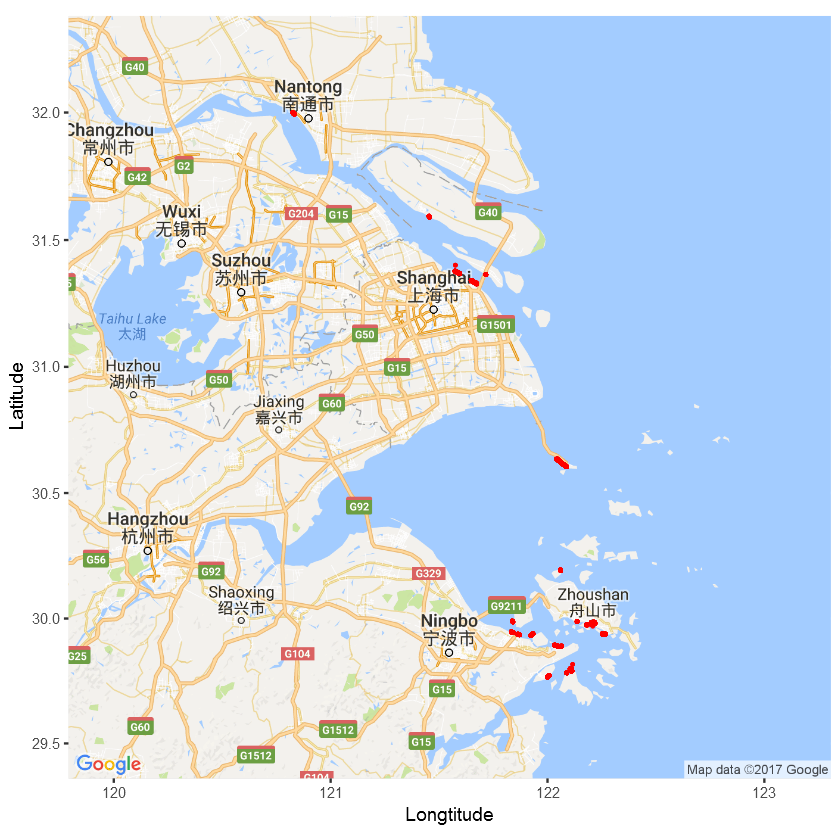

In [411]:
zoomSize=8
temp=sampledt
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'roadmap'))
#p=p+geom_path(data=temp,aes(x=lon,y=lat),color='green',size=0.1)
p=p+geom_point(data=temp,aes(x=lon,y=lat),color='red',size=0.2,alpha=0.75)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.9,0.2))
p

In [412]:

dt1 <- as.matrix(sampledt[,list(lon,lat)])
#kNNdistplot(dt1, k=10)
## the knee is around a distance of .4
cl <- dbscan(dt1, eps = 0.01, minPts =10)
dt2=data.table(cbind(sampledt,c=cl$cluster));
nrow(dt2[c>0,.N,c])

[1] 19

In [425]:
#head(dt2)
cships=dt2[,.N,by=list(c,mmsi)][,mmsi,c][,.N,c]
#cships

[1] 149989

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=30.882647,121.546132&zoom=8&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false


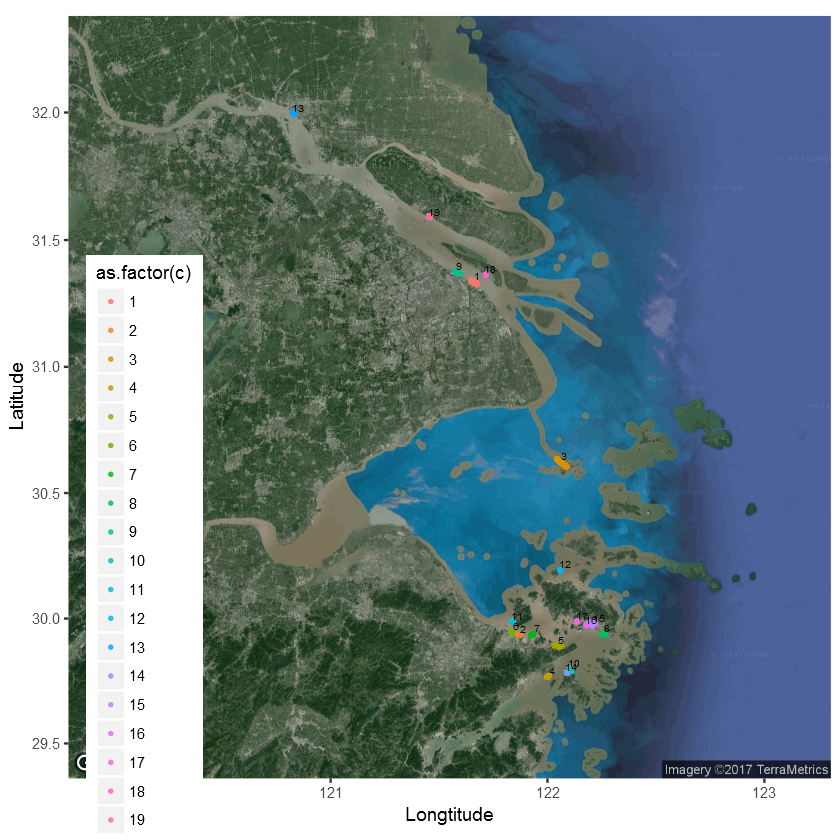

In [414]:
zoomSize=8
temp=dt2[c>0];nrow(temp)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))
p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.02,nudge_y = 0.02,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
p

#### as shown from above figure, we can see that the shape of a terminal or a group of berths are a narrow rectangle.This feature may be able to be used to remove clusters which are not really a berth such archor area

[1] 19118

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=30.6204,122.065312&zoom=14&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

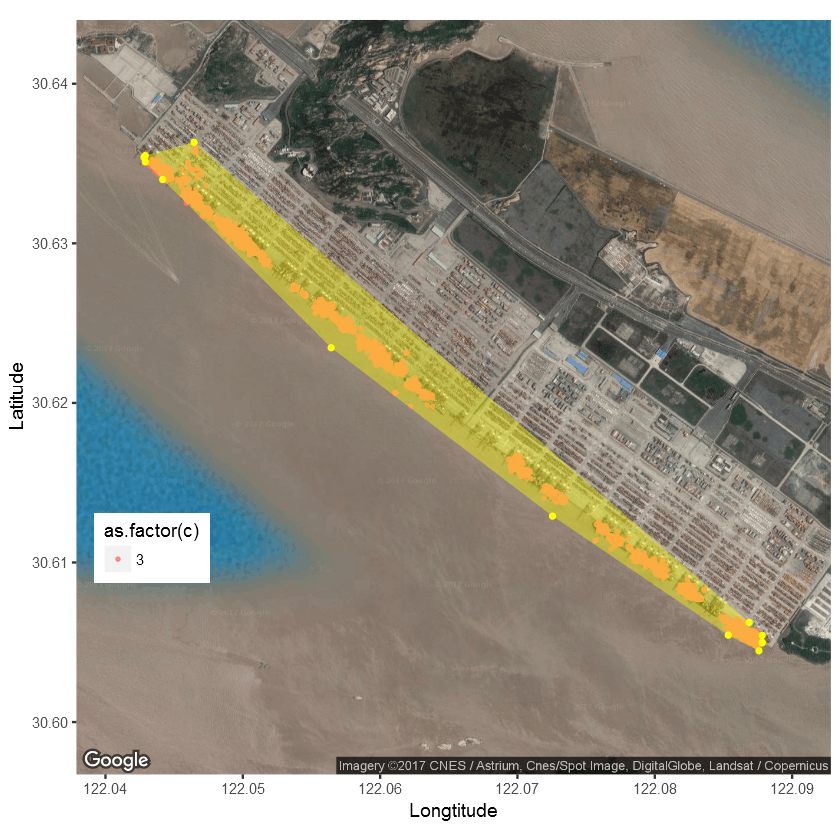

In [468]:
zoomSize=14
temp=dt2[c==3];nrow(temp)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))
p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
#p
hulls=temp[chull(temp[,list(lon,lat)]),]
p=p+geom_point(data = hulls, aes(x = lon, y = lat),size=1,col='yellow') 
p=p+geom_polygon(data = hulls, aes(x = lon, y = lat),fill='yellow',alpha = 0.4)
p


In [431]:
find_hull <- function(temp) df[chull(temp$lon, temp$lat), ]
hpts <- chull(as.matrix(temp[,list(lon,lat)]))
hpts <- c(hpts, hpts[1])
lines(temp[hpts, ])

ERROR: Error in plot.xy(xy.coords(x, y), type = type, ...): plot.new has not been called yet


[1] 2909

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.936239,121.867558&zoom=16&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

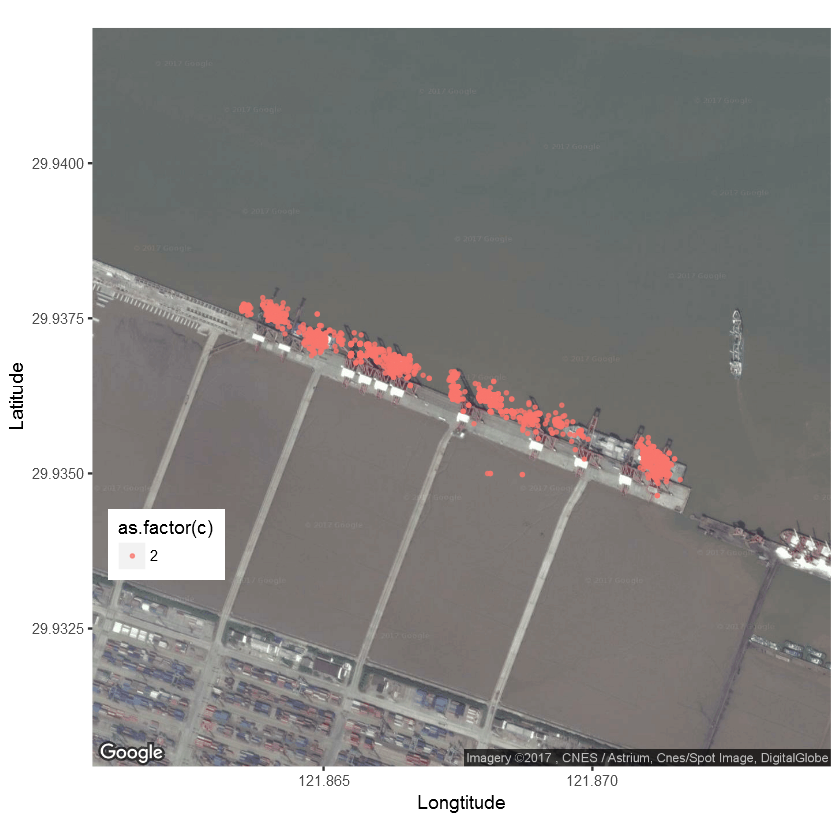

In [372]:
zoomSize=16
temp=dt2[c==2];nrow(temp)

centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))

p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
p

[1] 1220

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.782848,122.088966&zoom=14&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

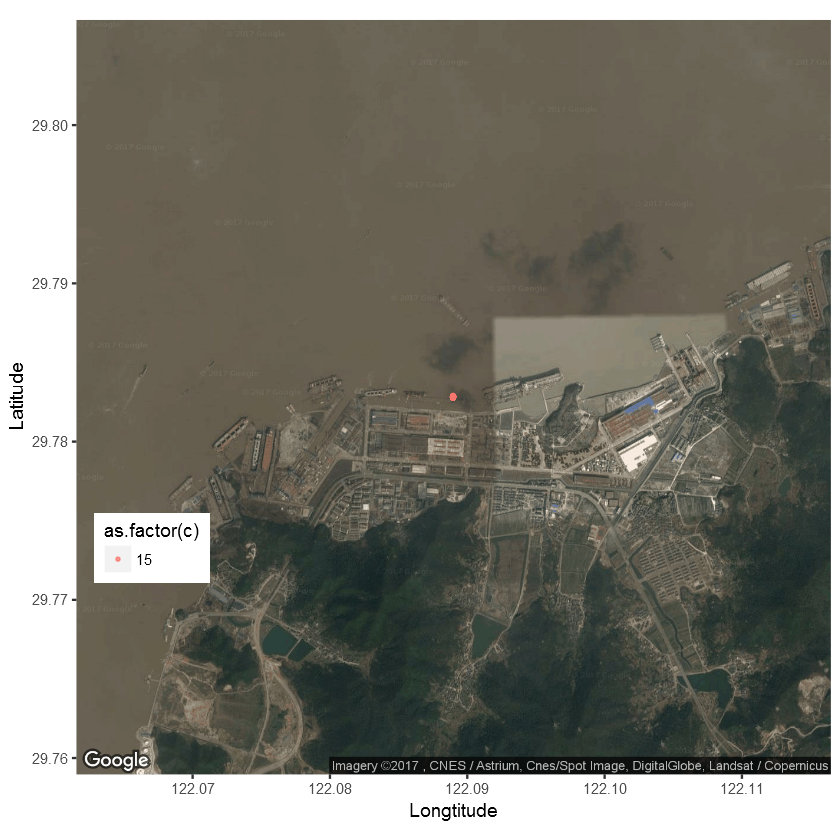

In [253]:
zoomSize=14
temp=dt2[c==15];nrow(temp)

centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))

p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
p

[1] 403

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=29.79936,122.106647&zoom=14&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

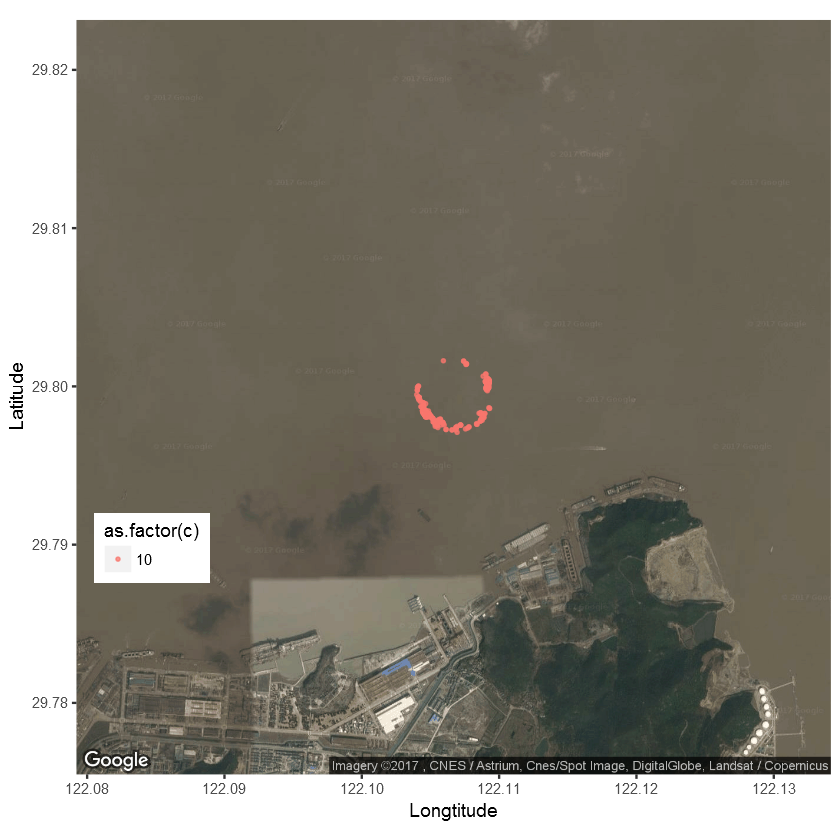

In [254]:
zoomSize=14
temp=dt2[c==10];nrow(temp)

centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))

p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
p

[1] 8027

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=31.996182,120.829365&zoom=16&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false
Warning message:
"Removed 1 rows containing missing values (geom_text)."

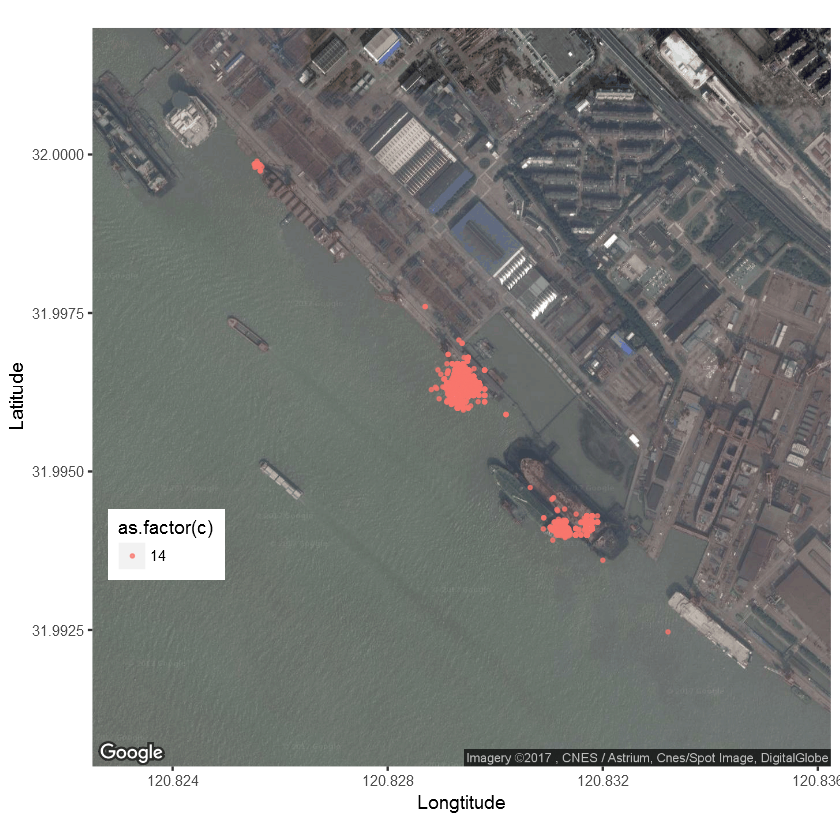

In [256]:
zoomSize=16
temp=dt2[c==14];nrow(temp)

centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))

p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.05,nudge_y = 0.05,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
p

In [416]:
#calcuate duration of each trip for each ship in each cluster
dt3=dt2[c>0,.N,list(c,mmsi)]
#head(dt2)
setkey(dt3,c,mmsi)
#head(dt3);dim(dt3)

In [421]:
eps.time=3600*2
minp=5
nr=nrow(dt3)
#nr=14
t0=data.table(mmsi=0,c=0,c1=0,dur=0)[mmsi<0]
for (i in seq(1:nr)){
    r=dt3[i]
    
    cship=dt2[mmsi==r$mmsi&c==r$c]
    setkey(cship,mmsi,time)
    cship2 <- as.matrix(cship[,time:=(time-min(cship$time))][,list(time)])#get time series
    cl2 <- dbscan(cship2, eps = eps.time, minPts =minp)
    cship3=data.table(cbind(cship,c1=cl2$cluster));
    if(nrow(cship3[c1>0])>0){
        
        t1=cship3[c1>0,list(dur=(max(.SD$time)-min(.SD$time))/3600),by=list(c,mmsi,c1)]
        t0=rbind(t0,t1) 
    }
}

#head(t0)
t2=t0[,list(uniques=length(unique(.SD$mmsi)),mean=mean(dur),median=median(dur)),c]
t3=t0[,list(uniques=length(unique(.SD$mmsi)),mean=mean(dur),median=median(dur)),c][mean<24]
t4=t0[,list(uniques=length(unique(.SD$mmsi)),mean=mean(dur),median=median(dur)),c][mean<24][uniques>5]
t4

c  uniques mean      median   
1  1 29      10.802774 11.382778
2  2 18       7.599076  6.552222
3  3 42      13.897189 14.491806
4  4 16       9.796490  9.469167
5  5 21      11.139683  9.200556
6  6 15      13.198694 14.135417
7  7  8      10.727483 10.707917
8  9 18      12.049820 11.224722
9 11  7       7.842350  7.700556

[1] 102687

Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=30.572358,121.830429&zoom=8&size=640x640&scale=2&maptype=satellite&language=en-EN&sensor=false


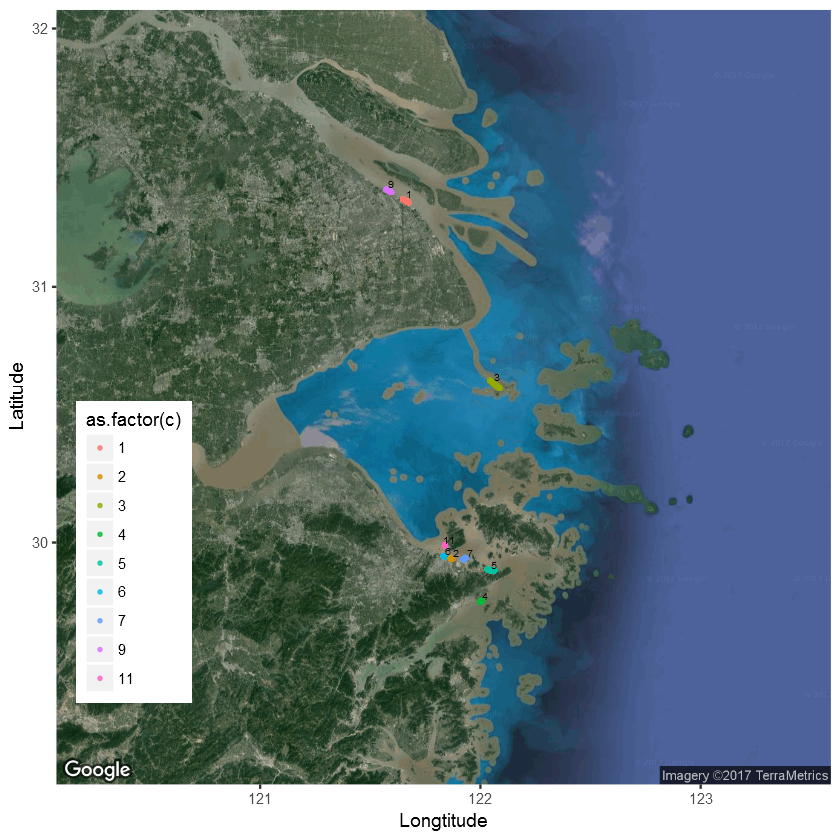

In [424]:
tms=t4$c
zoomSize=8
temp=dt2[c>0&c%in%tms];nrow(temp)
centerX=0.5*(max(temp$lon)+min(temp$lon))
centerY=0.5*(max(temp$lat)+min(temp$lat))
p<-ggmap(get_map(location=c(centerX,centerY),zoom=zoomSize,source='google',maptype = 'satellite'))

p=p+geom_point(data=temp,aes(x=lon,y=lat,col=as.factor(c)),size=0.5,alpha=0.75)
p=p+geom_text(data=temp[,.SD[1],c],nudge_x = 0.02,nudge_y = 0.02,aes(x=lon,y=lat,label=c),color='black',size=2)
p=p+labs(x="Longtitude",y="Latitude")+theme(legend.position=c(0.1,0.3))
p